Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Cluster centers:
 [[-0.18092309  0.03105725]]


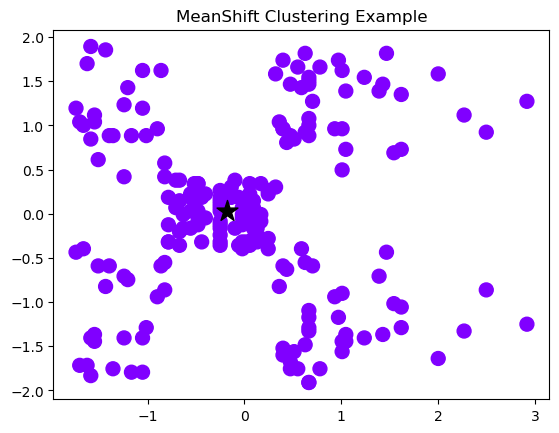

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Small example data (2D points)
data1 = pd.read_csv('Mall_Customers.csv')

# Step 3: Select features (Annual Income and Spending Score)
x = data1.iloc[:, [3, 4]].values  # Columns 3 and 4

# Step 4: Feature scaling (important for DBSCAN)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

# Apply MeanShift clustering
ms = MeanShift()
ms.fit(x)

# Labels for each point
labels = ms.labels_
# Cluster centers found
centers = ms.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:\n", centers)

# Plotting
plt.scatter(x[:,0], x[:,1], c=labels, s=100, cmap='rainbow')
plt.scatter(centers[:,0], centers[:,1], s=250, marker='*', color='black')
plt.title("MeanShift Clustering Example")
plt.show()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Number of clusters found: 3
Cluster centers (Annual Income, Spending Score):
 [[54.95402299 48.73563218]
 [81.88888889 81.5       ]
 [82.2        19.37142857]]


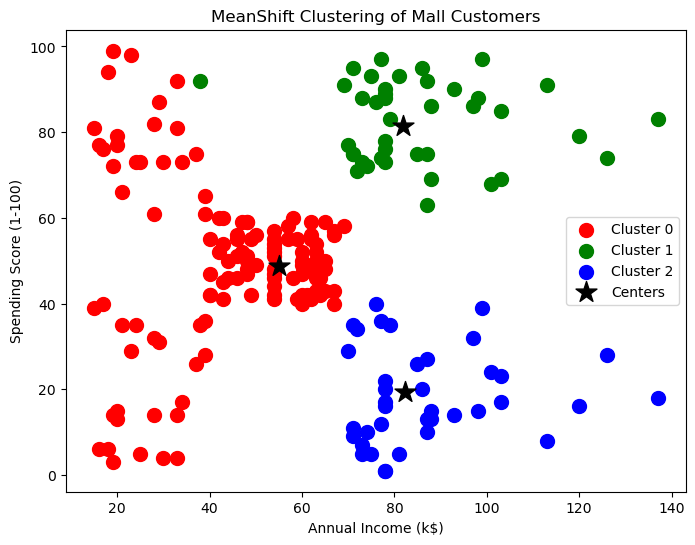

In [8]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv('Mall_Customers.csv')

# Step 2: Select features (Annual Income and Spending Score)
X = data.iloc[:, [3, 4]].values  # Columns 3 and 4

# Step 3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=len(X_scaled))

# Step 5: Apply MeanShift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_scaled)

# Step 6: Extract labels and cluster centers
labels = ms.labels_
print(labels)
cluster_centers_scaled = ms.cluster_centers_
n_clusters = len(np.unique(labels))

print("Number of clusters found:", n_clusters)

# Convert cluster centers back to original scale for interpretation
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)
print("Cluster centers (Annual Income, Spending Score):\n", cluster_centers)

# Step 7: Plot clusters
plt.figure(figsize=(8,6))
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']

for k in range(n_clusters):
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], 
                c=colors[k % len(colors)], label=f'Cluster {k}', s=100)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=250, 
            marker='*', c='black', label='Centers')
plt.title("MeanShift Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


In [35]:

import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load data
data = pd.read_csv('Mall_Customers.csv')
data

# Step 2: Select features (Annual Income and Spending Score)
X = data.iloc[:, [3, 4]].values  # Columns 3 and 4

# Step 3: Feature scaling
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
print(labels)
cluster_centers = ms.cluster_centers_
print('cluster_center:',cluster_centers)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
cluster_center: [[54.95402299 48.73563218]
 [81.88888889 81.5       ]
 [82.2        19.37142857]]
number of estimated clusters : 3


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

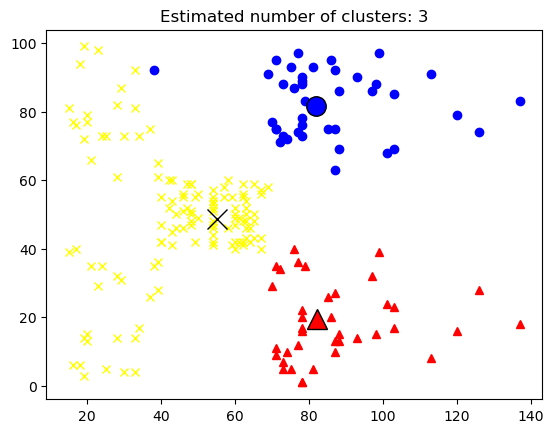

In [37]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["yellow", "blue", "red"]
markers = ["x", "o", "^"]

for k,col in zip(range(n_clusters_), colors):
    my_members = labels == k
    print(my_members)
    print(labels)
    print(k)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    plt.plot(X[my_members, 0], X[my_members, 1],markers[k],color=col)
    print(x)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()